# 🧠 Exploratory Analysis: Student Mental Health

This notebook explores mental health scores in international students based on their length of stay, using data from a public dataset available on Kaggle.


In [34]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo para los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [35]:
# Cargar los datos
df = pd.read_csv("../data/student_mental_health.csv")



# Mostrar las primeras filas
df.head()

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


### 📑 Dataset Columns Overview

- `stay`: Duration of stay in the host country
- `todep`: PHQ-9 score (Depression)
- `tosc`: SCS score (Self-compassion)
- `toas`: ASISS score (Acculturative stress)
- Other columns might be present (e.g., `gender`, `age`, etc.) but we’ll focus on the ones above.


In [36]:
# Información general del DataFrame
df.info()

# Ver si hay valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        97 non-null     object 
 1   region           97 non-null     object 
 2   gender           97 non-null     object 
 3   academic         97 non-null     object 
 4   age              97 non-null     float64
 5   age_cate         97 non-null     float64
 6   stay             97 non-null     float64
 7   stay_cate        97 non-null     object 
 8   japanese         97 non-null     float64
 9   japanese_cate    97 non-null     object 
 10  english          97 non-null     float64
 11  english_cate     97 non-null     object 
 12  intimate         89 non-null     object 
 13  religion         97 non-null     object 
 14  suicide          97 non-null     object 
 15  dep              97 non-null     object 
 16  deptype          97 non-null     object 
 17  todep            

inter_dom           3
region              3
gender              3
academic            3
age                 3
age_cate            3
stay                3
stay_cate           3
japanese            3
japanese_cate       3
english             3
english_cate        3
intimate           11
religion            3
suicide             3
dep                 3
deptype             3
todep               3
depsev              3
tosc                3
apd                 3
ahome               3
aph                 3
afear               3
acs                 3
aguilt              3
amiscell            3
toas                3
partner             3
friends             3
parents             3
relative            3
profess             3
phone               3
doctor              3
reli                3
alone               3
others              3
internet           28
partner_bi          0
friends_bi          0
parents_bi          3
relative_bi         3
professional_bi     3
phone_bi            3
doctor_bi 

In [37]:
# Ver cuántos valores nulos hay en las columnas relevantes
df[["stay", "todep", "tosc", "toas", "inter_dom"]].isnull().sum()


stay         3
todep        3
tosc         3
toas         3
inter_dom    3
dtype: int64

In [38]:
df["stay"].unique()


array([ 5.,  1.,  6.,  2.,  4.,  3.,  8., nan, 10.])

In [39]:
# Filtrar filas sin nulos en las columnas clave
df_filtered = df[["inter_dom", "stay", "todep", "tosc", "toas"]].dropna()

# Filtrar solo estudiantes internacionales
df_international = df_filtered[df_filtered["inter_dom"] == "Inter"]

# Agrupar por años de estancia y calcular promedios
df_grouped = df_international.groupby("stay")[["todep", "tosc", "toas"]].mean().reset_index()

# Mostrar tabla ordenada
df_grouped.sort_values(by="stay")


,stay,todep,tosc,toas
0,1.0,7.045455,39.045455,71.590909
1,2.0,7.875000,38.000000,78.833333
2,3.0,7.235294,37.294118,74.411765
3,4.0,9.285714,35.142857,91.428571
4,5.0,0.000000,34.000000,91.000000
5,6.0,4.000000,39.500000,67.000000
6,8.0,10.000000,44.000000,65.000000
7,10.0,13.000000,32.000000,50.000000


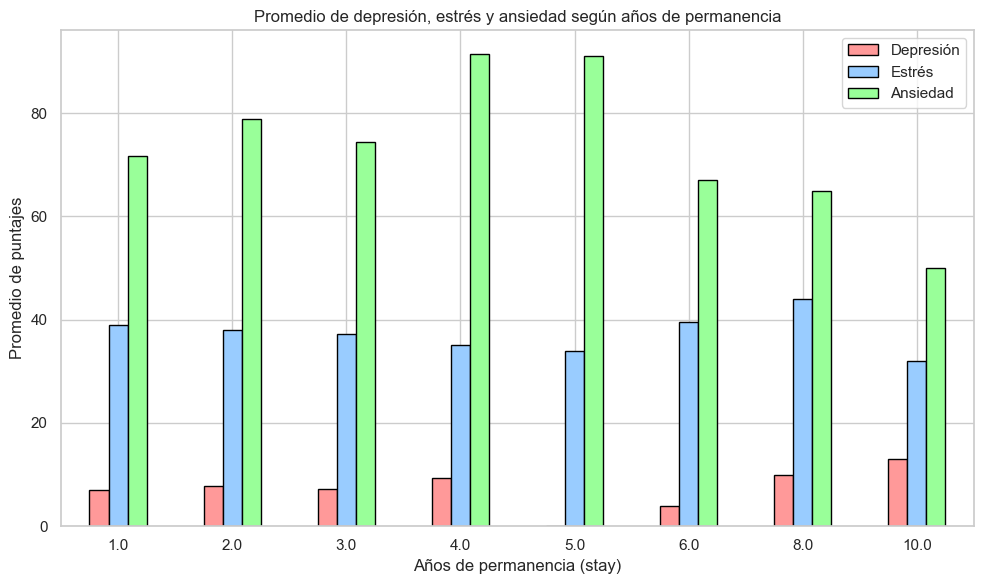

In [40]:
# Gráfico de barras múltiples
df_grouped.plot(
    x="stay",
    kind="bar",
    color=["#FF9999", "#99CCFF", "#99FF99"],
    edgecolor="black"
)

plt.title("Promedio de depresión, estrés y ansiedad según años de permanencia")
plt.xlabel("Años de permanencia (stay)")
plt.ylabel("Promedio de puntajes")
plt.legend(["Depresión", "Estrés", "Ansiedad"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


 ## :chart_with_upwards_trend: Análisis ##

 Al observar  la gráfica podemos ver que en la relación de las variables de Depresión, Estrés y Ansiedad con los años de permanencia en la universidad siendo estudiante extranjero no se identifican tendencias consistentes en los tres indicadores. Si bien los niveles de depresión tienden a aumentar con el tiempo, la ansiedad presenta valores elevados en los años intermedios (4 y 5), pero  luego disminuye. Por otro lado, el estrés se mantiene relativamente constante. Sin embargo, es importante tener en cuenta que algunos valores podrían estar influenciados por la baja cantidad de casos en ciertos grupos de stay, lo cual limita la posibilidad de generalizar estos resultados. Vamos ahora a contar la cantidad de estudiantes internacionales  que se encuentran por cada valor de stay,


In [52]:
# Conteo de estudiantes internacionales por años de permanencia
df_international["stay"].value_counts().sort_index()


stay
1.0     44
2.0     24
3.0     17
4.0      7
5.0      1
6.0      2
8.0      1
10.0     1
Name: count, dtype: int64

El anterior resultado nos permite observar que a partir del cuarto año de permanencia la cantidad de estudiantes internacionales baja considerablmente, esto incluso podemos observar desde el año 2  en donde la cantidad se reduce casi hasta la mitad con respecto al año 1. Lo anterior nos permite comprobar que los los promedios observados en la gráfica anterior para esos años quizás no sea tan representativa puesto que un valor podría elevar o bajar el promedio de forma exagerada.

Para poder mejorar este análisis vamos a probar agrupando los años por categorias para tener un poco más de datos por grupos y bajar esa variabilidad.

In [53]:
# Crear una nueva columna con rangos de permanencia
df_international["stay_range"] = pd.cut(
    df_international["stay"],
    bins=[0, 2, 4, 11],  # rangos: 0–2, 3–4, 5–10 años
    labels=["1-2 años", "3-4 años", "5+ años"]
)

# Agrupar por ese nuevo rango y calcular los promedios de depresión, ansiedad y estrés
df_grouped_range = df_international.groupby("stay_range")[["todep", "tosc", "toas"]].mean().reset_index()

# Mostrar el resultado
print(df_grouped_range)


  stay_range     todep       tosc       toas
0   1-2 años  7.338235  38.676471  74.147059
1   3-4 años  7.833333  36.666667  79.375000
2    5+ años  6.200000  37.800000  68.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_9908\3887155324.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_range = df_international.groupby("stay_range")[["todep", "tosc", "toas"]].mean().reset_index()


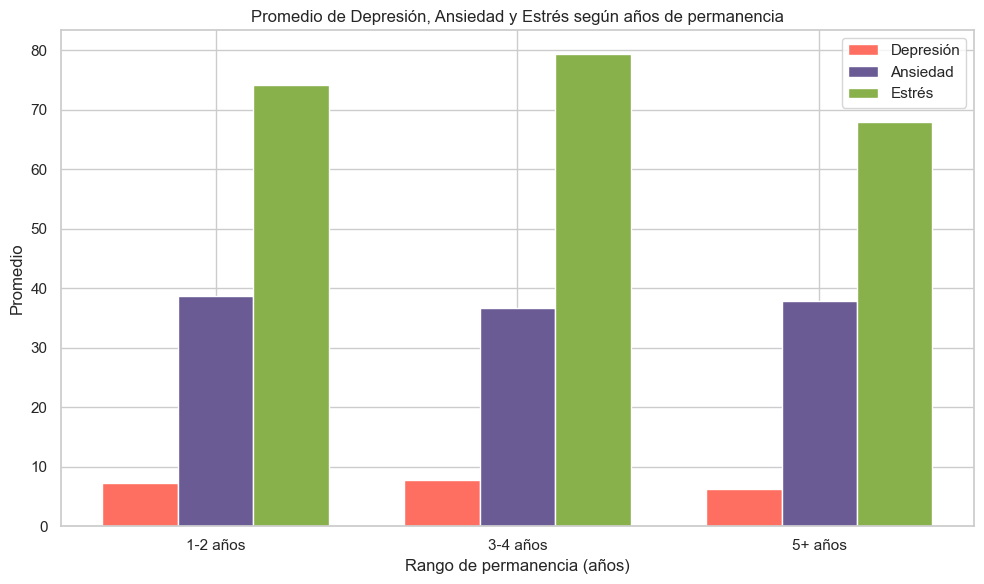

In [55]:


# Configurar posiciones y ancho de barras
x = df_grouped_range["stay_range"]
bar_width = 0.25
x_indexes = range(len(x))

# Crear figura
plt.figure(figsize=(10,6))

# Graficar cada barra
plt.bar([i - bar_width for i in x_indexes], df_grouped_range["todep"], width=bar_width, label="Depresión", color="#FF6F61")
plt.bar(x_indexes, df_grouped_range["tosc"], width=bar_width, label="Ansiedad", color="#6B5B95")
plt.bar([i + bar_width for i in x_indexes], df_grouped_range["toas"], width=bar_width, label="Estrés", color="#88B04B")

# Etiquetas y título
plt.xticks(ticks=x_indexes, labels=x)
plt.xlabel("Rango de permanencia (años)")
plt.ylabel("Promedio")
plt.title("Promedio de Depresión, Ansiedad y Estrés según años de permanencia")
plt.legend()
plt.tight_layout()
plt.show()


### Análisis Final

#### 1. Depresión (todep)  
- Los estudiantes con 1 a 2 años de estancia presentan un promedio de depresión de 7.33, que aumenta ligeramente en el grupo de 3 a 4 años (7.83).  
- En cambio, en el grupo con 5 años o más, el promedio disminuye a 6.2.  
- No hay una tendencia ascendente clara. Es posible que entre el tercer y cuarto año se acumulen factores de estrés y adaptación, pero luego se observe una mejoría en los síntomas.

#### 2. Ansiedad (tosc)  
- El grupo de 1 a 2 años tiene el promedio más alto de ansiedad (38.67). Este valor disminuye ligeramente en el grupo de 3 a 4 años (36.67), y vuelve a aumentar en el grupo de 5 o más años (37.8).  
- La ansiedad se mantiene en niveles similares, sin cambios drásticos. Puede estar influenciada por factores personales o académicos que se mantienen constantes en el tiempo.

#### 3. Estrés (toas)  
- Los niveles de estrés más altos se observan en el grupo de 3 a 4 años (79.38), en comparación con los grupos de 1 a 2 años (74.15) y de 5 o más años (68).  
- El estrés tiende a aumentar hacia la mitad del proceso académico, posiblemente por la carga de trabajo o expectativas acumuladas, y disminuye después, lo que puede indicar un proceso de adaptación o desarrollo de estrategias de afrontamiento.

---

### Final Analysis 

#### 1. Depression (todep)  
- Students with 1 to 2 years of stay show an average depression score of 7.33, which slightly increases for those with 3 to 4 years (7.83).  
- For students staying 5 or more years, the average drops to 6.2.  
- There is no clear upward trend. It is possible that mental health challenges peak in years 3–4 due to accumulated stress or cultural adjustment, but symptoms may improve over time.

#### 2. Anxiety (tosc)  
- The highest average anxiety score is found in the 1–2 year group (38.67). It slightly decreases in the 3–4 year group (36.67), then rises again in the 5+ year group (37.8).  
- Anxiety remains relatively stable, suggesting that consistent academic or personal factors may influence it across time.

#### 3. Stress (toas)  
- The highest levels of stress are observed in the 3–4 year group (79.38), compared to the 1–2 year group (74.15) and the 5+ year group (68).  
- Stress appears to increase during the mid-phase of the academic journey, possibly due to workload and expectations, but decreases later, which could reflect adaptation or improved coping mechanisms.


In [50]:
# Agrupar por duración de estadía (stay) y calcular métricas
result = df.groupby('stay').agg(
    count_int=('stay', 'count'),
    average_phq=('todep', lambda x: round(x.mean(), 2)),
    average_scs=('tosc', lambda x: round(x.mean(), 2)),
    average_as=('toas', lambda x: round(x.mean(), 2))
).reset_index()

# Ordenar de forma descendente
result = result.sort_values(by='stay', ascending=False)

# Mostrar resultado
result.head(9)


,stay,count_int,average_phq,average_scs,average_as
7,10.0,1,13.00,32.00,50.00
6,8.0,1,10.00,44.00,65.00
5,6.0,2,4.00,39.50,67.00
4,5.0,1,0.00,34.00,91.00
3,4.0,7,9.29,35.14,91.43
2,3.0,17,7.24,37.29,74.41
1,2.0,24,7.88,38.00,78.83
0,1.0,44,7.05,39.05,71.59


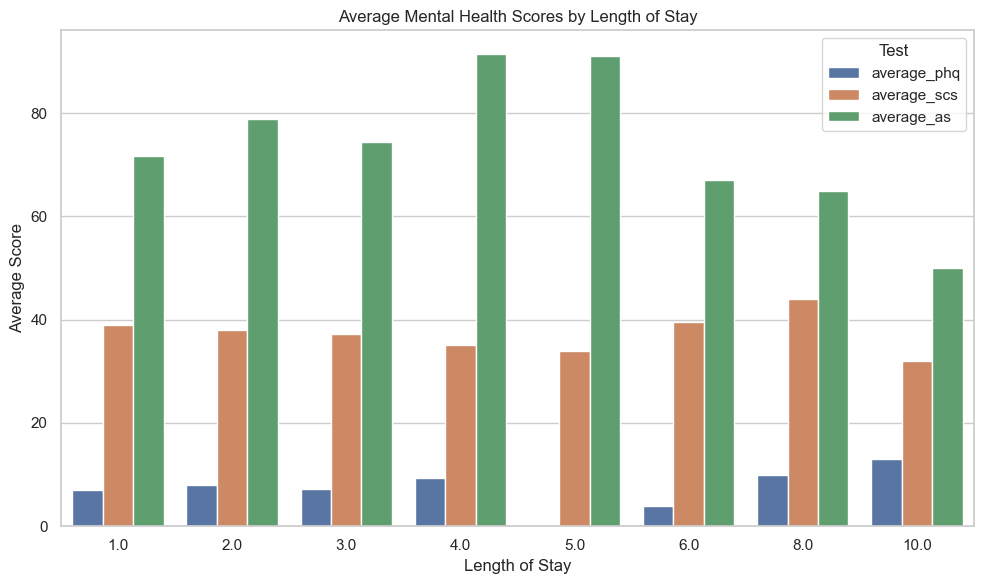

In [51]:
# Gráfico de barras para comparar promedios según estadía
result_melted = result.melt(id_vars='stay', value_vars=['average_phq', 'average_scs', 'average_as'],
                            var_name='Test', value_name='Average Score')

sns.barplot(data=result_melted, x='stay', y='Average Score', hue='Test')
plt.title("Average Mental Health Scores by Length of Stay")
plt.xlabel("Length of Stay")
plt.ylabel("Average Score")
plt.legend(title='Test')
plt.tight_layout()
plt.show()
